<a href="https://colab.research.google.com/github/mcpedrosa/car-damage-detection/blob/main/02_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Exploratory Data Analysis for Car Damage Detection**
This notebook performs an Exploratory Data Analysis (EDA) on the car damage datasets used.

The notebook focuses on two main aspects of car damage:

1. **Damage Location:** It analyzes the distribution of images across different damage locations (front, rear, side) and checks the average image resolution for each location.
2. **Damage Severity:** It explores the distribution of images based on damage severity (minor, moderate, severe), examines image resolution for each severity level, and analyzes the color channel distributions to understand color characteristics associated with different damage severities.

The **analysis aims to gain insights** into the dataset's characteristics, which can be valuable **for preprocessing and model building for car damage detection**.

In [2]:
!pip install ipython-autotime
%load_ext autotime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.6 MB/s eta 0:00:00
time: 227 µs (started: 2025-02-20 02:23:09 +00:00)


### **Import libraries**

In [4]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import os
import cv2
import imghdr
import pandas as pd
# import mimetypes
from PIL import Image

time: 1.11 s (started: 2025-02-20 03:13:03 +00:00)


<ipython-input-4-c07c0b52d770>:6: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


### **Mount Google Drive**
If your data is in your google drive, you need to mount it to access the dataset stored there.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

###**Damage Location**

In [ ]:
## set the path to the folders where the dataset is stored
front = os.listdir('/content/drive/My Drive/Colab Notebooks/Data/car-damage-dataset/data2a/combined/front')
rear = os.listdir('/content/drive/My Drive/Colab Notebooks/Data/car-damage-dataset/data2a/combined/rear')
side = os.listdir('/content/drive/My Drive/Colab Notebooks/Data/car-damage-dataset/data2a/combined/side')

time: 143 ms (started: 2024-06-08 09:34:09 +00:00)


#### **Checking the distribution of classes for damage location**
Plot the distribution of images across the damage locations using bar plots.

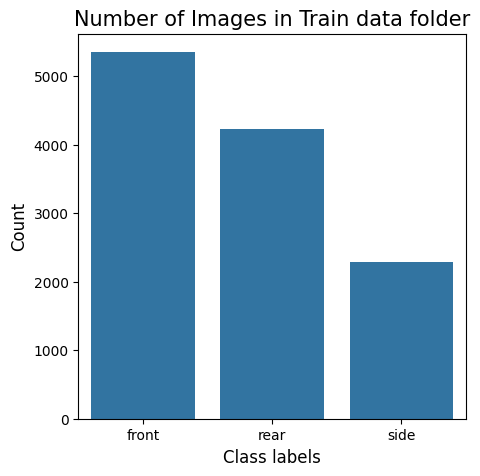

Number of front images is 5354
Number of rear images is 4231
Number of side images is 2291
time: 196 ms (started: 2024-06-08 09:34:17 +00:00)


In [ ]:
## Check the distribution of classes for damage location
def plot_bar(class_labels,counts,name):
    plt.figure(figsize = (5,5))
    f = sns.barplot(x = classes,y =counts)
    plt.xlabel("Class labels", fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title("Number of Images in "+name+' folder', fontsize=15)
    plt.show()


classes = ['front', 'rear', 'side']

counts = [len(front), len(rear), len(side)]
plot_bar(classes,counts,'Train data')
for i in range(len(classes)):
    print('Number of '+classes[i]+' images is '+str(counts[i]))



#### **Checking image resolution for damage location**
Check the resolution for every car panel. To check the resolution, calculate the average height and width of images in a specific folder (e.g., 'side' damage).

In [ ]:
## checking average resolution
widths = []
heights = []

dir_path = "/content/drive/My Drive/Colab Notebooks/Data/car-damage-dataset/data2a/combined/side"

for img_name in os.listdir(dir_path):
    if img_name.endswith(".jpeg"):
        img_path = os.path.join(dir_path, img_name) # Adding img_name to the path
        im = Image.open(img_path)
        widths.append(im.size[0])
        heights.append(im.size[1])

AVG_HEIGHT = round(sum(heights)/len(heights))
AVG_WIDTH = round(sum(widths)/len(widths))

print(f"Average Height: {AVG_HEIGHT}")
print(f"Average Width: {AVG_WIDTH}")

Average Height: 475
Average Width: 633
time: 56 s (started: 2024-06-08 10:34:38 +00:00)


### **Damage Severity**

In [ ]:
## set the path to the folders where the dataset is stored
minor = os.listdir('/content/drive/My Drive/Colab Notebooks/Data/car-damage-dataset/data3a/combined/minor')
moderate = os.listdir('/content/drive/My Drive/Colab Notebooks/Data/car-damage-dataset/data3a/combined/moderate')
severe = os.listdir('/content/drive/My Drive/Colab Notebooks/Data/car-damage-dataset/data3a/combined/severe')

time: 27.4 s (started: 2024-06-08 10:27:27 +00:00)


#### **Checking the distribution of classes for damage severity**
Plot the distribution of images across the damage severity using bar plots.

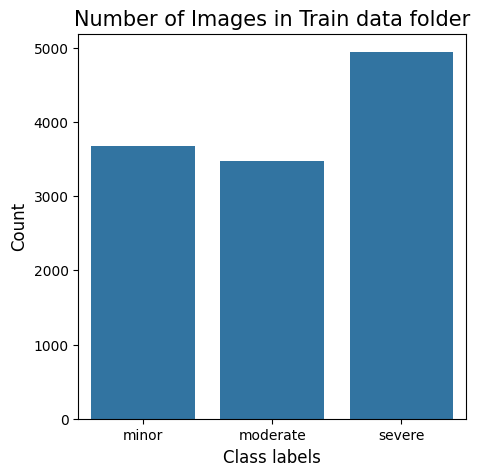

Number of minor images is 3677
Number of moderate images is 3471
Number of severe images is 4943
time: 152 ms (started: 2024-06-08 10:27:58 +00:00)


In [ ]:
## Check the distribution of classes for damage severity
def plot_bar(class_labels,counts,name):
    plt.figure(figsize = (5,5))
    f = sns.barplot(x = classes,y =counts)
    plt.xlabel("Class labels", fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title("Number of Images in "+name+' folder', fontsize=15)
    plt.show()


classes = ['minor', 'moderate', 'severe']

counts = [len(minor), len(moderate), len(severe)]
plot_bar(classes,counts,'Train data')
for i in range(len(classes)):
    print('Number of '+classes[i]+' images is '+str(counts[i]))



In [ ]:
## checking the total number of images for damage severity
len(minor)+len(moderate)+len(severe)

12091

time: 3.02 ms (started: 2024-06-08 10:29:16 +00:00)


#### **Checking image resolution for damage severity**
Check the resolution for every damage severity.

In [ ]:
## checking average resolution
widths = []
heights = []

dir_path = "/content/drive/My Drive/Colab Notebooks/Data/car-damage-dataset/data3a/combined/severe"

for img_name in os.listdir(dir_path):
    if img_name.endswith(".jpeg"):
        img_path = os.path.join(dir_path, img_name) # Adding img_name to the path
        im = Image.open(img_path)
        widths.append(im.size[0])
        heights.append(im.size[1])

AVG_HEIGHT = round(sum(heights)/len(heights))
AVG_WIDTH = round(sum(widths)/len(widths))

print(f"Average Height: {AVG_HEIGHT}")
print(f"Average Width: {AVG_WIDTH}")

Average Height: 478
Average Width: 638
time: 1min 44s (started: 2024-06-08 10:45:44 +00:00)


#### **Checking the distribution of color channels**
Analyze the color channel distributions for images in each severity folder (minor, moderate, severe) and plot histograms for red, green, and blue channels. This analysis will be used to understand color characteristics associated with different damage severities and will help in knowing which preprocessing techniques to undergo/choose.

**Note:** You can also do this analysis for the images on damage location.

##### **Minor Damage**

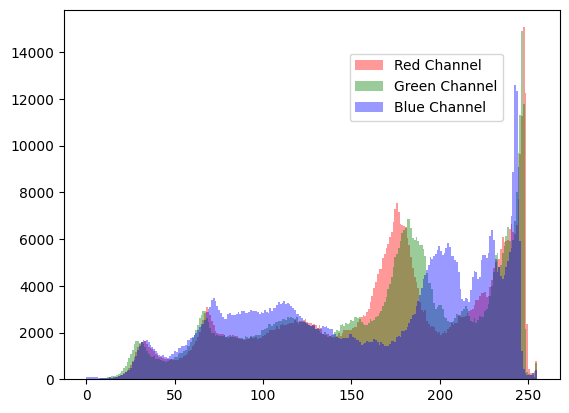

time: 7min 1s (started: 2024-06-08 11:53:17 +00:00)


In [ ]:
## Check distribution of color channels
nb_bins = 256
count_r = np.zeros(nb_bins)
count_g = np.zeros(nb_bins)
count_b = np.zeros(nb_bins)


for image in os.listdir('/content/drive/My Drive/Colab Notebooks/Data/car-damage-dataset/data3a/combined/minor/'):
  img = Image.open('/content/drive/My Drive/Colab Notebooks/Data/car-damage-dataset/data3a/combined/minor/'+image)
  x = np.array(img)
  x = x.transpose(2, 0, 1)
  hist_r = np.histogram(x[0], bins=nb_bins, range=[0, 255])
  hist_g = np.histogram(x[1], bins=nb_bins, range=[0, 255])
  hist_b = np.histogram(x[2], bins=nb_bins, range=[0, 255])
  count_r += hist_r[0]
  count_g += hist_g[0]
  count_b += hist_b[0]

bins = hist_r[1]
fig = plt.figure()


plt.hist(x[0].ravel(), bins = 256, color = 'red', alpha = 0.4, label='Red Channel')
plt.hist(x[1].ravel(), bins = 256, color = 'green', alpha = 0.4, label='Green Channel')
plt.hist(x[2].ravel(), bins = 256, color = 'blue', alpha = 0.4, label='Blue Channel');
plt.legend(loc='upper right', bbox_to_anchor=(0.5, 0., 0.4, 0.9));

##### **Moderate Damage**

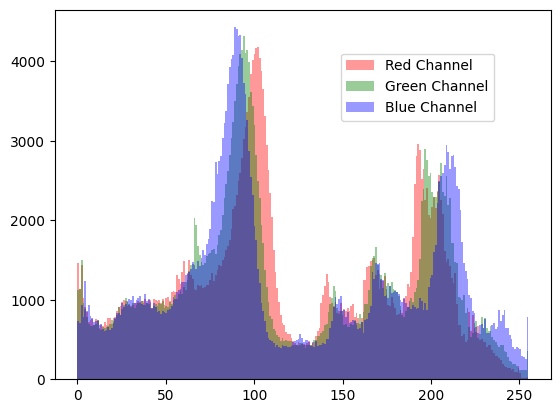

time: 2min 6s (started: 2024-06-08 12:00:18 +00:00)


In [ ]:
nb_bins = 256
count_r = np.zeros(nb_bins)
count_g = np.zeros(nb_bins)
count_b = np.zeros(nb_bins)


for image in os.listdir('/content/drive/My Drive/Colab Notebooks/Data/car-damage-dataset/data3a/combined/moderate/'):
  img = Image.open('/content/drive/My Drive/Colab Notebooks/Data/car-damage-dataset/data3a/combined/moderate/'+image)
  x = np.array(img)
  x = x.transpose(2, 0, 1)
  hist_r = np.histogram(x[0], bins=nb_bins, range=[0, 255])
  hist_g = np.histogram(x[1], bins=nb_bins, range=[0, 255])
  hist_b = np.histogram(x[2], bins=nb_bins, range=[0, 255])
  count_r += hist_r[0]
  count_g += hist_g[0]
  count_b += hist_b[0]

bins = hist_r[1]
fig = plt.figure()
plt.hist(x[0].ravel(), bins = 256, color = 'red', alpha = 0.4, label='Red Channel')
plt.hist(x[1].ravel(), bins = 256, color = 'green', alpha = 0.4, label='Green Channel')
plt.hist(x[2].ravel(), bins = 256, color = 'blue', alpha = 0.4, label='Blue Channel');
plt.legend(loc='upper right', bbox_to_anchor=(0.5, 0., 0.4, 0.9));

##### **Severe Damage**

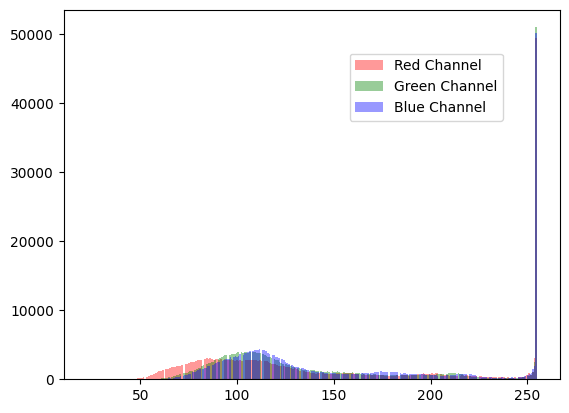

time: 2min 40s (started: 2024-06-08 12:02:25 +00:00)


In [ ]:
nb_bins = 256
count_r = np.zeros(nb_bins)
count_g = np.zeros(nb_bins)
count_b = np.zeros(nb_bins)


for image in os.listdir('/content/drive/My Drive/Colab Notebooks/Data/car-damage-dataset/data3a/combined/severe/'):
  img = Image.open('/content/drive/My Drive/Colab Notebooks/Data/car-damage-dataset/data3a/combined/severe/'+image)
  x = np.array(img)
  x = x.transpose(2, 0, 1)
  hist_r = np.histogram(x[0], bins=nb_bins, range=[0, 255])
  hist_g = np.histogram(x[1], bins=nb_bins, range=[0, 255])
  hist_b = np.histogram(x[2], bins=nb_bins, range=[0, 255])
  count_r += hist_r[0]
  count_g += hist_g[0]
  count_b += hist_b[0]

bins = hist_r[1]
fig = plt.figure()

plt.hist(x[0].ravel(), bins = 256, color = 'red', alpha = 0.4, label='Red Channel')
plt.hist(x[1].ravel(), bins = 256, color = 'green', alpha = 0.4, label='Green Channel')
plt.hist(x[2].ravel(), bins = 256, color = 'blue', alpha = 0.4, label='Blue Channel');
plt.legend(loc='upper right', bbox_to_anchor=(0.5, 0., 0.4, 0.9));